# Class Assignment

## Ordinary least squares and linear regression

Ordinary least squares (OLS) regression is the most commonly used method for conducting a linear regression. This model attempts to find a line that minimizes the squared distance between data points and the line ("least squares"). OLS regression
offers a clear method for choosing one or more predictors (or features ) that predict a single outcome in a linear manner.

### Regression Equation

A regression analysis yields an equation similar to the slope of a line, which is a mathematical representation of the shape of how your input variables predict your output variables. It's often presented as follows:

$Y = \alpha + \beta_1X_1 + \beta_2X_2 + e$

Y, representing a value for your outcome variable, is predicted by the slope of the line ($\alpha$) plus a coefficient, ($\beta$),
multiplied by each value $X$.

## House Data

In this exercise we will:
* Fit a line to housing dataset
* Use the line to predict unobserved values

### Import the libraries

In [108]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data

In [133]:
df = pd.read_csv("house_price.csv")

In [134]:
# Let's take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LotArea    1407 non-null   int64
 1   SalePrice  1407 non-null   int64
dtypes: int64(2)
memory usage: 22.1 KB


In [135]:
X = df[['LotArea']]
y = df['SalePrice']

### Split the data into training and test sets

In [136]:
# Splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


### Train the model using the training set

In [137]:
# Training the Simple Linear Regression model on the Training set
# import linear_model from sklearn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # created our model

regressor.fit(X_train, y_train) # Train the model

LinearRegression()

### Predict the model using the test set

In [138]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#print(y_pred)

### Visualize the results

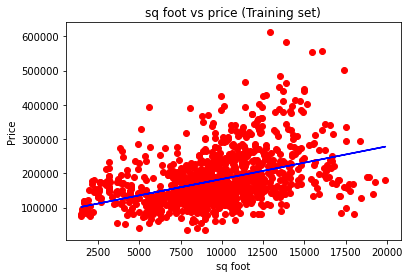

In [139]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sq foot vs price (Training set)')
plt.xlabel('sq foot')
plt.ylabel('Price')
plt.show()

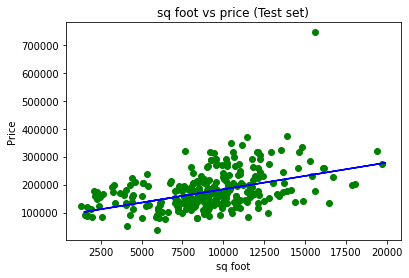

In [140]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sq foot vs price (Test set)')
plt.xlabel('sq foot')
plt.ylabel('Price')
plt.show()

In [141]:
# Model intercept and slope

print(f"The slope is {regressor.coef_} and the intercept is {regressor.intercept_}.")

The slope is [9.54886464] and the intercept is 87867.87901780229.


In [142]:
# R-squared
print(f"The r-squared values is {round(regressor.score(X,y),3)}")

The r-squared values is 0.175


The R-squared value indicates a weak positive correlation.

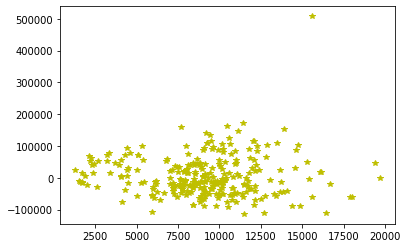

In [143]:
# plot residuals
resi = y_test - y_pred
plt.plot(X_test, resi, 'y*')

In [146]:
# predict a value using a trained model
regressor.predict([[15000]])

array([231100.84863401])

### Remove Outliers

An outlier is often considered any data point outside of 1.5 x the IQD where IQD is the interquartile distance.

Let's look at the distributions of the Sale Price and Lot Areas:

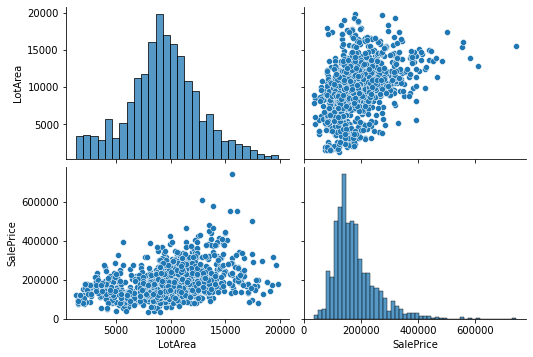

In [147]:
sns.pairplot(df, aspect=1.5 );

We can see that the distribution of the LotArea is fairly normal and the distribution of the Sale Price is skewed to the right.

### Determine Interquartile Range (IQR)

Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers

In [179]:
# Determine the IQR and see if any point are beyond 1.5 * IQR

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lowLimit = Q1 - 1.5 * IQR
highLimit = Q3 + 1.5 * IQR

print(f"Any house price below {'${:,.0f}'.format(lowLimit)} \
and above {'${:,.0f}'.format(highLimit)} is considered an outlier.")

Any house price below $7,500 and above $331,500 is considered an outlier.


In [149]:
# Check how many houses meet this criteria

df[(df['SalePrice'] > highLimit) | (df['SalePrice'] < lowLimit)]

,LotArea,SalePrice
11,11924,345000
57,13682,438780
111,9965,383970
148,13891,372402
158,13688,412500
...,...,...
1305,14720,410000
1325,11400,466500
1339,14892,377500
1366,16545,340000


In [150]:
# There are 61 Sales Price outliers - let us remove them

df2 = df[(df['SalePrice'] < highLimit) | (df['SalePrice'] < lowLimit)]

In [151]:
print(f"In the df2 dataframe we now have {df2.count()[0]} values.")

In the df2 dataframe we now have 1346 values.


### Retrain model and compare

In [158]:
X = df2[['LotArea']]
y = df2['SalePrice']

In [159]:
# Splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [160]:
# Training the Simple Linear Regression model on the Training set
# import linear_model from sklearn
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression() # created our model

regressor2.fit(X_train, y_train) # Train the model

LinearRegression()

In [161]:
# Predicting the Test set results
y_pred = regressor2.predict(X_test)
#print(y_pred)

In [162]:
# Model intercept and slope

print(f"The slope is {regressor2.coef_} and the intercept is {regressor2.intercept_}.")

The slope is [6.87377472] and the intercept is 103929.80606671626.


In [163]:
# R-squared
print(f"The r-squared values is {round(regressor2.score(X,y),3)}")

The r-squared values is 0.143


Surprisingly the R-squared is lower.